# Classifying movie reviews: a binary classification example

Design a neural network to perform two-class classification or _binary classification_ , of reviews form IMDB movie reviews dataset, to determine wether the reviews are positive or negative. We will use the Python library Keras to perform the classification

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [3]:
# Load the IMDb dataset from the CSV file using pandas
df = pd.read_csv('dataset/IMDB Dataset.csv')

# Preprocess the text data
tokenizer = Tokenizer(num_words=10000)  # Set the desired vocabulary size
tokenizer.fit_on_texts(df['review'])

sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=100)


In [4]:
# Prepare the target labels
labels = np.array(df['sentiment'].map({'positive': 1, 'negative': 0}))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

In [5]:

# Create the neural network model
model = Sequential()
model.add(Embedding(10000, 100, input_length=100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,117,377
Trainable params: 1,117,377
Non-trainable params: 0
_________________________________________________________________


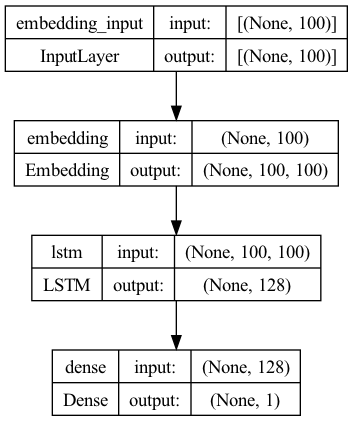

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Plot the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [8]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5


2023-05-25 10:25:08.138378: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1250/1250 [==============================] - 81s 65ms/step - loss: 0.3907 - accuracy: 0.8211 - val_loss: 0.3545 - val_accuracy: 0.8478
Epoch 2/5
1250/1250 [==============================] - 81s 65ms/step - loss: 0.2572 - accuracy: 0.8965 - val_loss: 0.3015 - val_accuracy: 0.8685
Epoch 3/5
1250/1250 [==============================] - 80s 64ms/step - loss: 0.1933 - accuracy: 0.9249 - val_loss: 0.3246 - val_accuracy: 0.8691
Epoch 4/5
1250/1250 [==============================] - 76s 61ms/step - loss: 0.1401 - accuracy: 0.9484 - val_loss: 0.3933 - val_accuracy: 0.8624
Epoch 5/5
1250/1250 [==============================] - 76s 61ms/step - loss: 0.1027 - accuracy: 0.9635 - val_loss: 0.4520 - val_accuracy: 0.8592


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')